# Classifying Tweet Sentiment (Natural Language Processing)

* **Student name:** Caroline Surratt
* **Student pace:** Self-Paced
* **Scheduled project review date/time:** TBD
* **Instructor name:** Morgan Jones

In [1]:
# insert picture in cell above

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/tweet_data.csv', encoding='latin')

In [4]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
df.columns = ['tweet_text', 'product', 'emotion']
df.head()

,tweet_text,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   product     3291 non-null   object
 2   emotion     9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
df.isna().sum()

tweet_text       1
product       5802
emotion          0
dtype: int64

In [8]:
# Add markdown about missing values

In [9]:
# Drop the missing tweet

In [11]:
df['product'].value_counts()

product
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [12]:
# Decide whether or not this column is going to be included and add markdown
# Probably not - this is labeled data that wouldn't be available for future/unseen tweets

In [13]:
df['length'] = df['tweet_text'].apply(lambda x: str(x)).apply(lambda x: len(x))
df.head()

,tweet_text,product,emotion,length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131


In [14]:
df.iloc[0,0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [15]:
len(df.iloc[0,0])

127

In [16]:
# The cells above can be deleted later, but included to double-check that lambda function was working

In [18]:
df.emotion.value_counts()

emotion
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

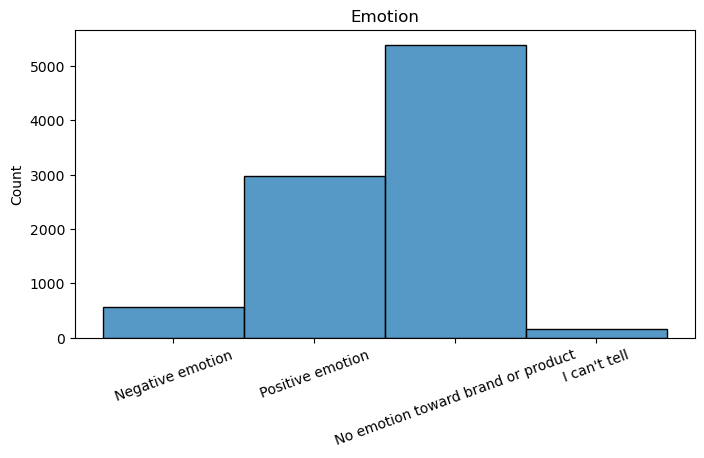

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fit, ax = plt.subplots(figsize=(8,4))
sns.histplot(df['emotion'], ax=ax).set_title("Emotion")
ax.tick_params(axis='x', rotation=20)
ax.set_xlabel("");

In [21]:
tweet_sample = df.iloc[0, 0]
tweet_sample

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [23]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
tokenizer.tokenize(tweet_sample)

['wesley83',
 'have',
 '3G',
 'iPhone',
 'After',
 'hrs',
 'tweeting',
 'at',
 'RISE_Austin',
 'it',
 'was',
 'dead',
 'need',
 'to',
 'upgrade',
 'Plugin',
 'stations',
 'at',
 'SXSW']

In [24]:
tweet_sample

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'